<a href="https://colab.research.google.com/github/deltorobarba/sciences/blob/master/tda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Quantum Advantage in Topological Data Analysis**

Calculations in context of paper '*Analyzing Prospects for Quantum Advantage in Topological Data Analysis*' https://journals.aps.org/prxquantum/abstract/10.1103/PRXQuantum.5.010319

*We propose an improved quantum algorithm for Topological Data Analysis (TDA) that significantly reduces computational scaling. Our method incorporates advancements like a new Dicke state preparation technique based on inequality testing, a more efficient amplitude estimation algorithm utilizing Kaiser windows, and an optimized implementation of eigenvalue projectors using Chebyshev polynomials. Through our analysis, we find that super-quadratic quantum speedups for this problem are only possible when aiming for a multiplicative error approximation and when the Betti number grows asymptotically. We also show that while exponentially large dimension and Betti number are necessary for a super-polynomial advantage, they are not sufficient. Despite this, we identify specific problem instances where quantum circuits with tens of billions of Toffoli gates could solve classically intractable problems.*


**The paper *"Analyzing Prospects for Quantum Advantage in Topological Data Analysis"* presents a new quantum algorithm for estimating Betti numbers — topological invariants that count the number of $k$-dimensional holes in a simplicial complex constructed from data. The authors build on prior quantum approaches but introduce several key optimizations to reduce the cost of fault-tolerant implementation, focusing on both asymptotic and constant-factor improvements. Central to their method is the use of the Dirac operator, a Hermitian matrix whose kernel encodes Betti numbers through its spectral structure. By working with this operator instead of the traditional combinatorial Laplacian, they enable a more efficient quantum algorithm that supports qubitization and block encoding techniques.**

To begin the computation, the algorithm prepares a Dicke state: an equal superposition over all bitstrings with Hamming weight $k$, which represent subsets of $k$ vertices. From this, a quantum subroutine identifies which of these bitstrings correspond to actual $k$-cliques in the input graph. This clique-checking step is optimized using Toffoli-efficient classical data access, allowing the quantum circuit to mark valid clique states. These marked states are then amplified using amplitude amplification, ensuring the algorithm focuses only on valid simplices.

The next step constructs a block-encoded version of the Dirac operator acting on the clique subspace. Instead of performing full Hamiltonian simulation, the authors use qubitization to build a quantum walk operator whose eigenvalues encode the spectrum of the Dirac operator. This avoids overhead from simulating time evolution and enables a clean spectral mapping. They then apply a Chebyshev polynomial filter to project onto the kernel of the Dirac operator, isolating eigenstates with zero eigenvalue — which correspond directly to nontrivial topological features.

Finally, amplitude estimation is used to determine the fraction of the total state that lies in this kernel, from which the Betti number is derived. The algorithm is designed to estimate the normalized quantity $\beta_k / |\text{Cl}_k(G)|$ with a fixed relative error, and its overall complexity scales as the square root of the inverse of this normalized quantity — offering a quadratic improvement over classical sampling and potential super-polynomial speedups when Betti numbers are large.

Throughout the paper, the authors analyze constant factors in Toffoli complexity, provide fault-tolerant cost estimates, and identify parameter regimes (e.g., large Betti numbers and high-dimensional simplicial complexes) where quantum advantage is realistic. They also rigorously compare their method against previous quantum TDA algorithms, as well as known classical dequantization techniques, and argue that their use of spectral filtering, qubitized walks, and minimal quantum memory makes the algorithm robust against known classical simulation strategies. The paper thereby provides one of the most comprehensive and concrete proposals to date for achieving a practical quantum advantage in topological data analysis.

<font color="blue">*In this paper we propose a quantum algorithm for estimating Betti numbers — topological invariants that characterize features like connected components, loops, and voids — via an efficient, fault-tolerant implementation of quantum topological data analysis (TDA). The following steps define their approach to achieve superpolynomial speedups under certain conditions:*</font>

1. **Prepare a Dicke state as a starting point for clique superpositions**

The initial quantum state must represent an equal-weight superposition of \$n\$-qubit computational basis states with Hamming weight \$k\$:

$$
|\text{Dicke}_k\rangle = \frac{1}{\sqrt{\binom{n}{k}}} \sum_{|x| = k} |x\rangle
$$

These basis states correspond to subsets of \$k\$ vertices in a graph \$G\$. To reduce gate complexity, the authors present new constructions using inequality testing or thresholding schemes that allow the Dicke state to be entangled with garbage ancilla registers. These methods outperform prior enumeration-based approaches with Toffoli complexity reductions of up to two orders of magnitude.

2. **Project onto the space of \$k\$-cliques**

Only a subset of Hamming-weight-\$k\$ bitstrings represent actual \$k\$-cliques in the input graph \$G\$. To detect them, the circuit checks if all \$\binom{k}{2}\$ potential edges among the \$k\$ vertices exist. This is achieved by iterating over a classical database of edges (or missing edges, if sparse) and summing ancilla bits that mark the presence of edges. A quantum OR over these results determines whether the state lies in the valid clique subspace \$H^G\_k \subset H\_k\$. The cost of this subroutine is:

$$
\text{Toffoli cost} =
\begin{cases}
3|E| + 2 \log k & \text{(edge database)} \\
2|E^C| & \text{(missing-edge database)}
\end{cases}
$$

3. **Amplify the clique subspace using amplitude amplification**

Since the Dicke state spans all \$\binom{n}{k}\$ combinations, and only \$|Cl\_k(G)|\$ are actual cliques, we amplify the amplitude of the valid subspace using amplitude amplification. To determine the required number of iterations, they estimate the overlap amplitude \$a\$:

$$
a = \sqrt{\frac{|Cl_k(G)|}{\binom{n}{k}}}
$$

using improved **Kaiser window-based amplitude estimation**:

$$
N = \frac{\pi}{\epsilon} \sqrt{1 + \alpha^2} \approx \frac{1}{2\epsilon} \ln(1/\delta)
$$

This separates estimation from amplification, improving efficiency over fixed-point amplitude amplification.

4. **Block-encode the Dirac operator for the quantum walk**

The core of the algorithm is the **Dirac operator**:

$$
B_G =
\begin{bmatrix}
0 & \partial^G_{k-1} & 0 \\
\partial^{G\dagger}_{k-1} & 0 & \partial^G_k \\
0 & \partial^{G\dagger}_k & 0
\end{bmatrix}
$$

where \$\partial^G\_k\$ are the boundary maps restricted to clique spaces. The square \$B\_G^2\$ contains the **combinatorial Laplacian**:

$$
\Delta_k = \partial^{G\dagger}_k \partial^G_k + \partial^G_{k+1} \partial^{G\dagger}_{k+1}
$$

and its kernel dimension gives the Betti number:

$$
\beta_k = \dim(\ker \Delta_k)
$$

To avoid Hamiltonian simulation, the authors directly **block encode** \$B\_G / \lambda\$ and construct a walk operator via **qubitization**:

$$
W = i (2 |0\rangle\langle 0| \otimes P - I) \cdot V, \quad \text{such that } W |0\rangle|k\rangle = i \frac{E_k}{\lambda} |0\rangle|k\rangle + \cdots
$$

Here, \$P\$ projects onto the valid subspace of Hamming weights \$k \pm 1\$ and cliques. The Toffoli cost of this walk construction is:

$$
\text{Toffoli cost} = 6|E| + 5n + 11 \log n + O(1)
$$

5. **Use Chebyshev filtering to isolate zero eigenvalues**

To project onto the zero-eigenvalue eigenspace of \$B\_G\$, they construct a **Chebyshev polynomial filter**:

$$
w(\phi) = \epsilon \cdot T_\ell(\beta \cos \phi), \quad \text{with } \beta = \cosh\left(\frac{1}{\ell} \cosh^{-1}(1/\epsilon)\right)
$$

The required polynomial degree is:

$$
\ell \leq \frac{\lambda}{\lambda_{\text{min}}} \ln\left(\frac{2}{\epsilon}\right)
$$

This provides an efficient and optimal alternative to phase estimation for identifying topological features corresponding to zero modes.

6. **Estimate kernel dimension via overlap estimation**

Finally, the filtered state is subjected to amplitude estimation again to compute:

$$
\frac{\beta_k}{|Cl_k(G)|}
$$

which estimates the normalized Betti number. A key design choice is to work with **relative error** rather than additive error, since the normalization factor \$|Cl\_k(G)|\$ can be exponentially large, and Betti numbers often small. The total Toffoli complexity is:

$$
O\left(\frac{\ln(1/\delta)}{r^2} \sqrt{\frac{|Cl_k(G)|}{\beta_k}} \left[\cdots \right]\right)
$$

with all subroutines optimized for fault-tolerant execution.

7. **Quantum advantage regimes and hardness**

The authors analyze the **complexity class landscape** and identify that estimating normalized Betti numbers to additive precision is **DQC1-hard**, while exact kernel dimension counting is **QMA-hard**. Superpolynomial speedup is possible **only when**:

* The Betti number \$\beta\_k\$ grows asymptotically with the problem size
* The spectral gap of \$B\_G\$ is sufficiently large
* The graph is structured so that clique ratios favor amplification

They provide examples where up to **quartic** and **superpolynomial** advantages are realized compared to classical clique enumeration algorithms.

**Helper Functions**

In [ ]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd
from scipy.special import comb
from scipy.spatial.distance import pdist, squareform
from scipy.sparse.linalg import eigs
from itertools import product
import statistics

import sys
np.set_printoptions(threshold=sys.maxsize)

!pip install -U giotto-tda --q
from gtda.homology import VietorisRipsPersistence
from gtda.diagrams import NumberOfPoints
from gtda.time_series import SingleTakensEmbedding

In [ ]:
def quantum_cost(n, E, r, gap, k, betti_k_minus_one):
  """Calculates Toffoli count given parameters to the TDA algorithm.
  Args:
    n: number of vertices
    E: number of edges
    gap: difference between lowest and second lowest eigenvalue of the k-th
      order combinatorial Laplacian
    k: order of Betti number
    betti_k_minus_one: Betti number of order k-1

  Returns:
    Toffoli count
  """
  return n * E * np.sqrt(comb(n, k) / betti_k_minus_one) / (r * gap)

*Estimate Cost & Auxiliary Functions*

> $T_q=\widetilde{\mathcal{O}}\left(\frac{n|E|}{r \lambda_{\min }} \sqrt{\frac{1}{\beta_{k-1}}\left(\begin{array}{l}n \\ k\end{array}\right)}\right)$ $\quad$ (equation 59)

In [ ]:
def classical_cost(n, E, r, gap, k, betti_k_minus_one):
  """Calculates Toffoli count given parameters to the TDA algorithm.
  Args:
    n: number of vertices
    E: number of edges
    gap: difference between lowest and second lowest eigenvalue of the k-th
      order combinatorial Laplacian
    k: order of Betti number
    betti_k_minus_one: Betti number of order k-1

  Returns:
    Toffoli count
  """
  return n * E * np.sqrt(comb(n, k) / betti_k_minus_one) / (r * gap)

In [ ]:
def get_cliques_of_size(G, k):
  """Gets cliques of a graph.
  Args:
    G: `nx.Graph` problem graph
    k: order of Betti number being estimated

  Returns:
    A 3-tuple of `list`, respectively the cliques of size k-1, k and k+1
  """
  all_cliques = list(nx.enumerate_all_cliques(G))
  lower_cliques = list(filter(lambda x: len(x) == k-1, all_cliques))
  cliques = list(filter(lambda x: len(x) == k, all_cliques))
  upper_cliques = list(filter(lambda x: len(x) == k+1, all_cliques))

  return lower_cliques, cliques, upper_cliques

In [ ]:
def is_upper_clique(clique, upper_clique):
  """Decides if two cliques are adjacent. They have to have difference 1 in size.
  Args:
    clique: the smaller clique
    upper_clique: the larger clique

  Returns:
    Whether upper_clique is clique appended by one number
  """
  return (len(upper_clique) - len(clique) == 1) and (len(set(upper_clique) - set(clique)) == 1)

In [ ]:
def get_number_of_upper_cliques(clique, upper_cliques):
  """Gets number of upper cliques a clique has.
  Args:
    clique: the clique
    upper_cliques: a list with cliques of size 1 larger than clique

  Returns:
    The number of cliques in upper_cliques that are upper to clique.
  """
  total = 0
  for upper_clique in upper_cliques:
    if is_upper_clique(clique, upper_clique):
      total +=1

  return total

In [ ]:
def lower_not_upper_similarity(clique1, clique2, lower_cliques, upper_cliques):
  """Calculates off-diagonal entries of combinatorial Laplacian.

  Args:
    clique1: k-clique indexing the row
    clique2: k-clique indexing the column
    lower_cliques: `list` of (k-1)-cliques
    upper_cliques: `list` of (k+1)-cliques

  Returns:
    The off-diagonal entry at coordinate (clique1, clique2).
  """
  # have common upper?
  for upper_clique in upper_cliques:
    if is_upper_clique(clique1, upper_clique) and is_upper_clique(clique2, upper_clique):
      return 0

  # don't have common upper
  # have common lower?

  # clique1 and clique2 are lower similar if and only if they differ on exactly one vertex
  # Sign is given by the parity of the number of different elements: odd --> +1, even --> -1
  if len(set(clique1).difference(set(clique2)))==1:

    count = 0
    for i in range(len(clique1)):
      if clique1[i] != clique2[i]:
        count += 1

    return 2 * (count % 2) - 1

  # don't have common lower
  return 0

In [ ]:
### THIS IS ACTUALLY COMPUTING THE ORDER (k-1)
# returns the combinatorial Laplacian of order k of a graph
def get_laplacian(G, k):
  """Computes the k-th order Laplacian of a graph G using theorem 3.3.4 in
  http://www2.stat.duke.edu/~sayan/forkate/CombinatorialLaplacians.pdf.
  Assumes k > 1. Note that the indexing is off-by-note with the notes above.

  Args:
    G: `nx.Graph` input graph
    k: order of Betti number to be estimated

  Returns:
    The matrix of such combinatorial Laplacian.
  """

  lower_cliques, cliques, upper_cliques = get_cliques_of_size(G, k)

  n_cliques = len(cliques)
  laplacian = np.zeros((n_cliques, n_cliques))
  for (row, clique_row) in enumerate(cliques):
    for (column, clique_column) in enumerate(cliques):
      # diagonal
      if row == column:
        #laplacian[row][column] = k + 1 + get_number_of_upper_cliques(clique_row, upper_cliques)
        laplacian[row][column] = k + get_number_of_upper_cliques(clique_row, upper_cliques)

      # off-diagonals
      else:
        laplacian[row][column] = lower_not_upper_similarity(clique_row, clique_column, lower_cliques, upper_cliques)

  return laplacian

In [ ]:
def get_laplacian_spectrum(G, k):
  """Computes the eigenvalue spectrum of the k-th order Laplacian of a graph G

  Args:
    G: `nx.Graph` input graph
    k: order of the Betti number being estimated

  Returns:
    `list` of eigenvalues
  """
  if k == 1:
    eigvals = nx.adjacency_spectrum(G)
  else:
    laplacian = get_laplacian(G, k)
    eigvals = np.linalg.eigvals(laplacian)
  eigvals = np.sort(eigvals)

  return eigvals

In [ ]:
# calculates combinatorial laplacian gap of a graph G at order k as well as the
# number of zero eigenvalues
def get_laplacian_info(G, k):
  """Computes the difference between the second lowest and lowest eigenvalues
  of the k-th order Laplacian of a graph G

  Args:
    G: `nx.Graph` input graph
    k: order of the Betti number being estimated

  Returns:
    The gap of the Laplacian and the number of zero eigenvalues.
  """
  '''
  laplacian = get_laplacian(G, k)
  eigvals = np.linalg.eigvals(laplacian)
  '''
  # increments k since the code is actually computing the k-1 betti number if
  # k is used. This is because the k-homology is spanned by (k+1)-cliques.
  k += 1
  eigvals = get_laplacian_spectrum(G, k)
  eigvals = list(map(lambda x: 0 if np.abs(x) < 0.000000000001 else x, list(eigvals)))

  betti_number = eigvals.count(0)

  eigvals = np.unique(eigvals)

  #trivial kernel
  if len(eigvals) < 2:
    return None, None

  return eigvals[1] - eigvals[0], betti_number

**Classical Resource Estimate for TDA on k-partite complete graph**



Graph with 15 nodes and 75 edges


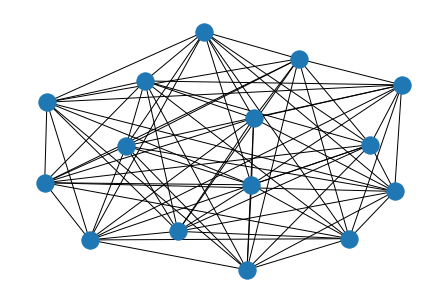

In [ ]:
# Create k-partite complete graph (according to IV.A., Figure 1, page 17) - 6 subsets of each 5 nodes

# Provide number of nodes (must be be multiple of 5)
n = 15

def values(n):
  cluster = int(n/5)                    # 5 is fixed number of nodes per cluster
  return [(5)for i in range(cluster)]

G = nx.complete_multipartite_graph(*values(n))

print(G)
nx.draw(G)

In [ ]:
# Classical TDA from Giotto library (to compute persistent diagrams)

# Create adjacency matrix of graph (as input for Giotto TDA library)
X = nx.adjacency_matrix(G)
np.shape(X)

(15, 15)

In [ ]:
def persistent_homology(X):
  # Instantiate topological transformer
  persistence = VietorisRipsPersistence(
      # Choose maximal homology dimension for TDA
      homology_dimensions=[0, 1, 2, 3, 4, 5],
      metric='precomputed',
      n_jobs=-1,
      reduced_homology=True,
      coeff=2,
      collapse_edges=True,
      max_edge_length=2.0)
  # Compute persistence diagrams corresponding to each graph in X
  diagram = persistence.fit_transform_plot(X)
  return diagram

In [ ]:
# Run classical TDA on k-partite complete graph
diagram = persistent_homology([X])
diagram

In [ ]:
# Get persistent diagram plot up to chosen homology dimension
VietorisRipsPersistence.plot(diagram)

In [ ]:
# Extract total number of topological features per homology dimension
table = pd.DataFrame((NumberOfPoints(n_jobs=-1).fit_transform(diagram)),
                     columns=['H0', 'H1', 'H2', 'H3', 'H4', 'H5'], index=['Topological Features'])
pd.set_option('display.max_rows', None)
table.insert(6, "Sum", table.sum(1))
table

,H0,H1,H2,H3,H4,H5,Sum
Topological Features,14,0,64,0,0,0,78


In [ ]:
# Cost function

def generate_plots(ns, ks):
  """Generates plots of combinatorial laplacian gap, betti number and number
  of Toffolis for a combination of n's and k's.

  Args:
    ns: `list` of `int` of n's
    ks: `list` of `int` of n's
  """
  n_samples = 50
  gaps = [[] for _ in range(len(ks))]
  gap_stds = [[] for _ in range(len(ks))]
  bettis = [[] for _ in range(len(ks))]
  betti_stds = [[] for _ in range(len(ks))]
  costs = [[] for _ in range(len(ks))]
  cost_stds = [[] for _ in range(len(ks))]

  for k_ind, k in enumerate(ks):
    for n in ns:
#      p = n ** (- (2 * k + 1)/float(2 * k * (k + 1)))
      betti_samples = []
      cost_samples = []
      gap_samples = []

      # Subsets of complete multipartite graph with 5 nodes each:
      subsets = [(5)for i in range(int(n/5))]

      for ind in range(n_samples):
        print(f'(k, n, sample) = ({k}, {n}, {ind})')

        # Get graph for different sizes of n
        G = nx.complete_multipartite_graph(*subsets)

#       G = nx.erdos_renyi_graph(n, p)

        gap, betti_number = get_laplacian_info(G, k)
        betti_samples.append(betti_number)
        gap_samples.append(gap)
        cost_samples.append(classical_cost(n, G.number_of_edges(), 0.05, gap, k, betti_number))

      cost_avg = sum(cost_samples) / n_samples
      betti_avg = sum(betti_samples) / float(n_samples)
      gap_avg = sum(gap_samples) / n_samples

      cost_std = statistics.stdev(np.real(cost_samples))
      betti_std = statistics.stdev(np.real(betti_samples))
      gap_std = statistics.stdev(np.real(gap_samples))

      costs[k_ind].append(cost_avg)
      bettis[k_ind].append(betti_avg)
      gaps[k_ind].append(gap_avg)

      cost_stds[k_ind].append(cost_std)
      betti_stds[k_ind].append(betti_std)
      gap_stds[k_ind].append(gap_std)

  fig = plt.figure(figsize=(20, 10))

  #fig.subplots_adjust(hspace=0.4, wspace=0.4)

  ax_costs = fig.add_subplot(1,3,1)
  for k_ind, k in enumerate(ks):
    ax_costs.scatter(ns, costs[k_ind])
    ax_costs.set_xlabel('n')
    ax_costs.set_ylabel('number of Toffolis')
    ax_costs.errorbar(ns, costs[k_ind], yerr=cost_stds[k_ind])
  ax_costs.legend([f'$k = {k}$' for k in ks])

  ax_gaps = fig.add_subplot(1,3,2)
  for k_ind, k in enumerate(ks):
    ax_gaps.scatter(ns, gaps[k_ind])
    ax_gaps.set_xlabel('n')
    ax_gaps.set_ylabel('Gap')
    ax_gaps.errorbar(ns, gaps[k_ind], yerr=gap_stds[k_ind])
  ax_gaps.legend([f'$k = {k}$' for k in ks])

  ax_bettis = fig.add_subplot(1,3,3)
  for k_ind, k in enumerate(ks):
    ax_bettis.scatter(ns, bettis[k_ind])
    ax_bettis.set_xlabel('n')
    ax_bettis.set_ylabel('Betti number')
    ax_bettis.errorbar(ns, bettis[k_ind], yerr=betti_stds[k_ind])
  ax_bettis.legend([f'$k = {k}$' for k in ks])

  plt.tight_layout()
  plt.subplots_adjust()
  plt.show()

In [ ]:
generate_plots([20], [1, 2])

(k, n, sample) = (1, 20, 0)
(k, n, sample) = (1, 20, 1)
(k, n, sample) = (1, 20, 2)
(k, n, sample) = (1, 20, 3)
(k, n, sample) = (1, 20, 4)
(k, n, sample) = (1, 20, 5)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in double_scalars
  


(k, n, sample) = (1, 20, 6)
(k, n, sample) = (1, 20, 7)
(k, n, sample) = (1, 20, 8)
(k, n, sample) = (1, 20, 9)
(k, n, sample) = (1, 20, 10)
(k, n, sample) = (1, 20, 11)
(k, n, sample) = (1, 20, 12)
(k, n, sample) = (1, 20, 13)
(k, n, sample) = (1, 20, 14)
(k, n, sample) = (1, 20, 15)
(k, n, sample) = (1, 20, 16)
(k, n, sample) = (1, 20, 17)
(k, n, sample) = (1, 20, 18)
(k, n, sample) = (1, 20, 19)
(k, n, sample) = (1, 20, 20)
(k, n, sample) = (1, 20, 21)
(k, n, sample) = (1, 20, 22)
(k, n, sample) = (1, 20, 23)
(k, n, sample) = (1, 20, 24)
(k, n, sample) = (1, 20, 25)
(k, n, sample) = (1, 20, 26)
(k, n, sample) = (1, 20, 27)
(k, n, sample) = (1, 20, 28)
(k, n, sample) = (1, 20, 29)
(k, n, sample) = (1, 20, 30)
(k, n, sample) = (1, 20, 31)
(k, n, sample) = (1, 20, 32)
(k, n, sample) = (1, 20, 33)
(k, n, sample) = (1, 20, 34)
(k, n, sample) = (1, 20, 35)
(k, n, sample) = (1, 20, 36)
(k, n, sample) = (1, 20, 37)
(k, n, sample) = (1, 20, 38)
(k, n, sample) = (1, 20, 39)
(k, n, sample) = (

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  


(k, n, sample) = (2, 20, 1)
(k, n, sample) = (2, 20, 2)
(k, n, sample) = (2, 20, 3)
(k, n, sample) = (2, 20, 4)
(k, n, sample) = (2, 20, 5)
(k, n, sample) = (2, 20, 6)


**Quantum TDA Test Run**

In [ ]:
# Try to plot things on a log / log plot so that we can try to infer the polynomial order of the gap scaling
def generate_plots(ns, ks):
  """Generates plots of combinatorial laplacian gap, betti number and number
  of Toffolis for a combination of n's and k's.

  Args:
    ns: `list` of `int` of n's
    ks: `list` of `int` of n's
  """
  n_samples = 100
  gaps = [[] for _ in range(len(ks))]
  gap_stds = [[] for _ in range(len(ks))]
  bettis = [[] for _ in range(len(ks))]
  betti_stds = [[] for _ in range(len(ks))]
  costs = [[] for _ in range(len(ks))]
  cost_stds = [[] for _ in range(len(ks))]

  for k_ind, k in enumerate(ks):
    for n in ns:
      p = n ** (- (2 * k + 1)/float(2 * k * (k + 1)))
      betti_samples = []
      cost_samples = []
      gap_samples = []
      for ind in range(n_samples):
        print(f'(k, n, sample) = ({k}, {n}, {ind})')
        G = nx.erdos_renyi_graph(n, p)
        gap, betti_number = get_laplacian_info(G, k)
        betti_samples.append(betti_number)
        gap_samples.append(gap)
        cost_samples.append(quantum_cost(n, G.number_of_edges(), 0.05, gap, k, betti_number))

      cost_avg = sum(cost_samples) / n_samples
      betti_avg = sum(betti_samples) / float(n_samples)
      gap_avg = sum(gap_samples) / n_samples

      cost_std = statistics.stdev(np.real(cost_samples))
      betti_std = statistics.stdev(np.real(betti_samples))
      gap_std = statistics.stdev(np.real(gap_samples))

      costs[k_ind].append(cost_avg)
      bettis[k_ind].append(betti_avg)
      gaps[k_ind].append(gap_avg)

      cost_stds[k_ind].append(cost_std)
      betti_stds[k_ind].append(betti_std)
      gap_stds[k_ind].append(gap_std)

  fig = plt.figure(figsize=(20, 10))

  #fig.subplots_adjust(hspace=0.4, wspace=0.4)

  ax_costs = fig.add_subplot(1,3,1)
  for k_ind, k in enumerate(ks):
    ax_costs.scatter(np.log(ns), np.log(costs[k_ind]))
    ax_costs.set_xlabel('log of n')
    ax_costs.set_ylabel('log of number of Toffolis')
    ax_costs.errorbar(np.log(ns), np.log(costs[k_ind]), yerr=np.log(cost_stds[k_ind]))
  ax_costs.legend([f'$k = {k}$' for k in ks])

  ax_gaps = fig.add_subplot(1,3,2)
  for k_ind, k in enumerate(ks):
    ax_gaps.scatter(np.log(ns), np.log(gaps[k_ind]))
    ax_gaps.set_xlabel('log of n')
    ax_gaps.set_ylabel('log of Gap')
    ax_gaps.errorbar(np.log(ns), np.log(gaps[k_ind]), yerr=np.log(gap_stds[k_ind]))
  ax_gaps.legend([f'$k = {k}$' for k in ks])

  ax_bettis = fig.add_subplot(1,3,3)
  for k_ind, k in enumerate(ks):
    ax_bettis.scatter(np.log(ns), np.log(bettis[k_ind]))
    ax_bettis.set_xlabel('log of n')
    ax_bettis.set_ylabel('log of Betti number')
    ax_bettis.errorbar(np.log(ns), np.log(bettis[k_ind]), yerr=np.log(betti_stds[k_ind]))
  ax_bettis.legend([f'$k = {k}$' for k in ks])

  plt.tight_layout()
  plt.subplots_adjust()
  plt.show()

generate_plots([25], [8])

**Quantum TDA Pipeline for Erdos-Renyi (ER), Finance and KMK**

In [ ]:
"""
Usage: to generate the data which will be stored in .npy files, run
generate_data(ns, ks, graph_type, file_prefix)

ns is the list of n, For kmk only, ns has to be a list of lists with [m,k].
ks is the lits of k,
graph type is one of
'ER' for Erdos-Renyi, 'financial' for financial data, 'kmk' for K(m,k) graph
and 'lattice' for the graph from condensed matter.
file_prefix is a potential
prefix for the file names.
Examples:

generate_data([10,20,30], [1,2,3,4,5], 10, 'ER', '')
generate_data([1,2,3,4], [1,2,3], 10, 'financial', '')
generate_data([[2,3],[3,3],[4,3]], [1,2,3,4,5], 10, 'kmk', '')
generate_data([3,4,5,6], [1,2,3], 10, 'lattice', '')

To plot the data, run
generate_plots(ks, graph_type, file_prefix)
where the arguments are as above.
"""

"\nUsage: to generate the data which will be stored in .npy files, run\ngenerate_data(ns, ks, graph_type, file_prefix)\n\nns is the list of n, For kmk only, ns has to be a list of lists with [m,k].\nks is the lits of k,\ngraph type is one of\n'ER' for Erdos-Renyi, 'financial' for financial data, 'kmk' for K(m,k) graph\nand 'lattice' for the graph from condensed matter.\nfile_prefix is a potential\nprefix for the file names.\nExamples:\n\ngenerate_data([10,20,30], [1,2,3,4,5], 10, 'ER', '')\ngenerate_data([1,2,3,4], [1,2,3], 10, 'financial', '')\ngenerate_data([[2,3],[3,3],[4,3]], [1,2,3,4,5], 10, 'kmk', '')\ngenerate_data([3,4,5,6], [1,2,3], 10, 'lattice', '')\n\nTo plot the data, run\ngenerate_plots(ks, graph_type, file_prefix)\nwhere the arguments are as above.\n"

In [ ]:
# Import raw data and display table content
url = 'https://raw.githubusercontent.com/deltorobarba/repo/master/sp500c.csv'
data_raw = pd.read_csv(url)

# Rename imported time series
data = data_raw

# Select specific features, and rename features
data = data[['Date', 'Open', 'High', 'Low', 'Close']].rename(columns={"Date": "date", "Close": "price"})
data = data.drop(['Open', 'High', 'Low'], axis=1)

# Set date index
data = data.set_index('date')

# Add Frequency (business days)
data.index = pd.to_datetime(data.index, utc=True)
data = data.asfreq('B') # B stands for business day, so that weekends and bank holiday as non trading day are ignored

# Remove nan
data = data.dropna()

data_original = data # We will need this later to differentiate between preprocessed and original data

# Log Return
data = np.log(data/data.shift(1)).dropna()

# data = (data-data.mean())/data.std()            # Mean Normalization
data = (data-data.min())/(data.max()-data.min())  # Min Max Normalization
fin_data = data.dropna()                          # remove nan value


In [ ]:
def pairwise_to_graph(pdist_matrix, filtration):
  """Generates a graph given a cloud of points.

  Args:
    pdist_matrix: matrix encoding pairwise distance between points.
    filtration: the filtration parameter.

  Returns:
    `nx.Graph` graph where there are edges between two points
    if their distance is less than filtration.
  """
  n = pdist_matrix.shape[0]
  G = nx.Graph()
  for row in range(n):
    for column in range(n):
      if row < column:
        if pdist_matrix[row][column] < filtration:
          G.add_edge(row, column)
  return G

In [ ]:
def gen_fin_graph(n):
  """Generates a graph from financial data.

  Args:
    n: `int` to choose a specific timeframe.

  Returns:
    `nx.Graph` graph representing the financial data from the indicated
    timeframe.
  """
  series = data
  if n==1:
    series = series['2010-01-01':'2010-04-30']
    #series = series['2009-01-01':'2009-04-30']
  elif n==2:
    series = series['2010-01-01':'2010-08-01']
    #series = series['2009-01-01':'2009-08-31']
  elif n==3:
    series = series['2010-01-01':'2011-01-01']
    #series = series['2009-01-01':'2009-12-31']
  elif n==4:
    series = series['2010-01-01':'2011-04-01']
  elif n==5:
    series = series['2010-01-01':'2011-08-01']
  elif n==6:
    series = series['2010-01-01':'2012-01-01']
  elif n==7:
    series = series['2010-01-01':'2012-04-01']
  elif n==8:
    series = series['2010-01-01':'2012-08-01']
  else:
    series = series['2010-01-01':'2013-01-01']


  embedding_dimension = 3                         # Upper bound for optimal embedding dimension d determined by false nearest neighbours
  embedding_time_delay = 3                        # Upper bound for optimal time delay Tau determined by mutual information or ACF
  parameters_type = "search"                      # Get optimal value for embedding_dimension & embedding_time_delay. Otherwise: "fixed"
  stride = 8                                      # Increase stride to reduce amount of data
  n_jobs=-1                                       # Maximum number of jobs to use for the computation

  # Takens Embedding
  embedder = SingleTakensEmbedding(
      parameters_type=parameters_type,
      n_jobs=n_jobs,
      time_delay=embedding_time_delay,
      dimension=embedding_dimension,
      stride=stride,
  )

  y_embedded = embedder.fit_transform(series.price)
  #print('Optimal time delay based on mutual information:', embedder.time_delay_)
  #print('Optimal embedding dimension based on false nearest neighbors:', embedder.dimension_)
  #print(f"Shape of embedded time series: {y_embedded.shape}")

  pairwise_distances = squareform(pdist(y_embedded, metric='euclidean'))
  graph = pairwise_to_graph(pairwise_distances, 0.75)
  return graph, graph.number_of_nodes()

In [ ]:
def gen_triangular_lattice(n):
  """Generates finite truncation of graph on the left side of Figure 2 in
  arXiv:cond-mat/0504595v2

    Args:
      n: number of triangle units

    Returns:
     `nx.Graph()` representation of the graph.
  """
  G = nx.Graph()
  G.add_edges_from([('1,1','1,2'), ('1,1', '1,3')])

  for j in range(2, n+1):
    # new triangle
    G.add_edges_from([(str(j)+',1', str(j)+',2'), (str(j)+',1', str(j)+',3')])

    # connections to previous one
    G.add_edges_from([(str(j-1)+',2', str(j)+',1'), (str(j)+',1', str(j-1)+',3'), (str(j-1)+',2', str(j)+',2'), (str(j)+',3', str(j-1)+',3')])

    graph_complement = nx.complement(G)
  return graph_complement, graph_complement.number_of_nodes()

In [ ]:
def gen_kmk(params):
  """Generates K(m,k) graph from section IV A in the paper.

  Args:
    params: a `list` [m, k] where m is the total number

  Returns:
    (`nx.Graph` graph, n) where n is the total number of nodes
  """

  m = params[0]
  k = params[1]
  def values(m):
     return [(m) for i in range(k)]

  G = nx.complete_multipartite_graph(*values(m))
  return G, m*k

In [ ]:
# Generate data and generate plots functions
def generate_data(ns, ks, n_samples, graph_type, file_prefix):
  """Generates data of combinatorial laplacian gap, betti number and number
  of Toffolis for a combination of n's and k's. Saves them locally as .npy files.

  Args:
    ns: `list` of `int` of n's
    ks: `list` of `int` of n's
    n_samples: `int` how many types to resample
    graph_type: `string` with graph type
    file_prefix: `string` with file name prefix
  """
  assert n_samples > 1, 'Number of samples must be greater than 1.\n'

  max_repeat = 5

  gaps = [[] for _ in range(len(ks))]
  bettis = [[] for _ in range(len(ks))]
  costs = [[] for _ in range(len(ks))]
  used_ns = [[] for _ in range(len(ks))]

  for k_ind, k in enumerate(ks):
    for n in ns:
      betti_samples = []
      cost_samples = []
      gap_samples = []

      ind = 0
      repeat = 0
      skip_n = False
      while ind < n_samples:
        if repeat > max_repeat:
          skip_n = True
          break
        ind += 1
        print(f'(k, n, sample) = ({k}, {n}, {ind})')
        if graph_type == 'ER':
          #p = n ** (- (2 * k + 1)/float(2 * k * (k + 1)))
          #p = n ** (0.5 * (-1/float(k) - 1/float(2*k+1)))
          p = n ** (-1 / (k+0.5))
          #print(p)
          G = nx.erdos_renyi_graph(n, p)
          actual_n = n
        elif graph_type == 'lattice':
          G, actual_n = gen_triangular_lattice(n)
        elif graph_type == 'kmk':
          G, actual_n = gen_kmk(n)
        elif graph_type == 'financial':
          G, actual_n = gen_fin_graph(n)
        else:
          print('Graph type not recognized.\n')
          return None

        gap, betti_number = get_laplacian_info(G, k)

        # trivial kernel
        if gap == None:
          repeat += 1
          ind -= 1
          continue

        # non-trivial kernel
        betti_samples.append(betti_number)
        gap_samples.append(gap)
        cost_samples.append(quantum_cost(actual_n, G.number_of_edges(), 0.05, gap, k, betti_number))

      if skip_n:
        print('Skipped n')
        continue

      used_ns[k_ind].append(actual_n)
      bettis[k_ind].append(betti_samples)
      gaps[k_ind].append(gap_samples)
      costs[k_ind].append(cost_samples)

  # saves data
  np.save(file_prefix + '_' + graph_type + '_bettis', bettis)
  np.save(file_prefix + '_' + graph_type + '_gaps', gaps)
  np.save(file_prefix + '_' + graph_type + '_costs', costs)
  np.save(file_prefix + '_' + graph_type + '_used_ns', used_ns)

In [ ]:
def generate_plots(ks, graph_type, file_prefix):
  """Generate plots from the data generated by generate_data().

  Args:
    ks: `list` of Betti order k
    graph_type: `string` with the graph type
    file_prefix: `string` with file name prefix
  """
  bettis = np.load(file_prefix + '_' + graph_type + '_bettis.npy', allow_pickle=True)
  gaps = np.load(file_prefix + '_' + graph_type + '_gaps.npy', allow_pickle=True)
  costs = np.load(file_prefix + '_' + graph_type + '_costs.npy', allow_pickle=True)
  used_ns = np.load(file_prefix + '_' + graph_type + '_used_ns.npy', allow_pickle=True)

  gap_avgs = [[] for _ in range(len(ks))]
  betti_avgs = [[] for _ in range(len(ks))]
  cost_avgs = [[] for _ in range(len(ks))]

  gap_stds = [[] for _ in range(len(ks))]
  betti_stds = [[] for _ in range(len(ks))]
  cost_stds = [[] for _ in range(len(ks))]

  for k_ind, k in enumerate(ks):
    for n_ind, n in enumerate(used_ns[k_ind]):
      cost_avgs[k_ind].append(np.average(costs[k_ind][n_ind]))
      betti_avgs[k_ind].append(np.average(bettis[k_ind][n_ind]))
      gap_avgs[k_ind].append(np.average(gaps[k_ind][n_ind]))

      cost_stds[k_ind].append(statistics.stdev(np.real(costs[k_ind][n_ind])))
      betti_stds[k_ind].append(statistics.stdev(np.real(bettis[k_ind][n_ind])))
      gap_stds[k_ind].append(statistics.stdev(np.real(gaps[k_ind][n_ind])))

  fig = plt.figure(figsize=(20, 10))

  ax_costs = fig.add_subplot(1,3,1)
  for k_ind, k in enumerate(ks):
    ax_costs.scatter(used_ns[k_ind], cost_avgs[k_ind])
    ax_costs.set_xlabel('n')
    ax_costs.set_ylabel('number of Toffolis')
    ax_costs.errorbar(used_ns[k_ind], cost_avgs[k_ind], yerr=cost_stds[k_ind])
  ax_costs.legend([f'$k = {k}$' for k in ks])

  ax_gaps = fig.add_subplot(1,3,2)
  for k_ind, k in enumerate(ks):
    ax_gaps.scatter(used_ns[k_ind], gap_avgs[k_ind])
    ax_gaps.set_xlabel('n')
    ax_gaps.set_ylabel('Gap')
    ax_gaps.errorbar(used_ns[k_ind], gap_avgs[k_ind], yerr=gap_stds[k_ind])
  ax_gaps.legend([f'$k = {k}$' for k in ks])

  ax_bettis = fig.add_subplot(1,3,3)
  for k_ind, k in enumerate(ks):
    ax_bettis.scatter(used_ns[k_ind], betti_avgs[k_ind])
    ax_bettis.set_xlabel('n')
    ax_bettis.set_ylabel('Betti number')
    ax_bettis.errorbar(used_ns[k_ind], betti_avgs[k_ind], yerr=betti_stds[k_ind])
  ax_bettis.legend([f'$k = {k}$' for k in ks])

  plt.tight_layout()
  plt.subplots_adjust()
  plt.savefig(file_prefix + '_' + graph_type + '_plot')
  plt.show()

In [ ]:
# Run ER analysis

#generate_data([10,20,30,35,40,45,50,55,60,65,70,75,80], [1,2,3,4,5], 10, 'ER', '')
generate_data([10,20], [1,2,3,4], 2, 'ER', '')
generate_plots([1,2,3,4], 'ER', '')

In [ ]:
a = np.load('_ER_bettis.npy', allow_pickle=True)
a

In [ ]:
plt.savefig('_ER_bettis.pdf')

In [ ]:
# Run lattice analysis

#generate_data([10,20,30,35,40,45,50,55,60,65,70,75,80], [1,2,3,4,5], 10, 'ER', '')
#generate_data([1,2,3,4], [1,2,3], 10, 'financial', '')
#generate_data([[2,3],[3,3],[4,3]], [1,2,3,4,5], 10, 'kmk', '')

generate_data([3,4,5,6], [1,2,3], 10, 'lattice', '')
generate_plots([1,2,3], 'lattice', '')

In [ ]:
generate_data([3,4,5,6,7,8,9], [1,2,3], 10, 'lattice', '')
generate_plots([1,2,3], 'lattice', '')

In [ ]:
# Run financial analysis

#generate_data([10,20,30,35,40,45,50,55,60,65,70,75,80], [1,2,3,4,5], 10, 'ER', '')
#generate_data([3,4,5,6,7,8,9], [1,2,3], 10, 'lattice', '')
#generate_data([[2,3],[3,3],[4,3]], [1,2,3,4,5], 10, 'kmk', '')

generate_data([1,2], [1,2], 10, 'financial', '')
generate_plots([1,2], 'financial', '')

**Code for Generating plots of combinatorial laplacian gap, betti number and number of Toffolis for a combination of n's and k's**

In [ ]:
def generate_plots(ns, ks):
  """Generates plots of combinatorial laplacian gap, betti number and number
  of Toffolis for a combination of n's and k's.

  Args:
    ns: `list` of `int` of n's
    ks: `list` of `int` of n's
  """
  n_samples = 50
  gaps = [[] for _ in range(len(ks))]
  gap_stds = [[] for _ in range(len(ks))]
  bettis = [[] for _ in range(len(ks))]
  betti_stds = [[] for _ in range(len(ks))]
  costs = [[] for _ in range(len(ks))]
  cost_stds = [[] for _ in range(len(ks))]

  for k_ind, k in enumerate(ks):
    for n in ns:
      p = n ** (- (2 * k + 1)/float(2 * k * (k + 1)))
      betti_samples = []
      cost_samples = []
      gap_samples = []
      for ind in range(n_samples):
        print(f'(k, n, sample) = ({k}, {n}, {ind})')
        G = nx.erdos_renyi_graph(n, p)
        gap, betti_number = get_laplacian_info(G, k)
        betti_samples.append(betti_number)
        gap_samples.append(gap)
        cost_samples.append(quantum_cost(n, G.number_of_edges(), 0.05, gap, k, betti_number))

      cost_avg = sum(cost_samples) / n_samples
      betti_avg = sum(betti_samples) / float(n_samples)
      gap_avg = sum(gap_samples) / n_samples

      cost_std = statistics.stdev(np.real(cost_samples))
      betti_std = statistics.stdev(np.real(betti_samples))
      gap_std = statistics.stdev(np.real(gap_samples))

      costs[k_ind].append(cost_avg)
      bettis[k_ind].append(betti_avg)
      gaps[k_ind].append(gap_avg)

      cost_stds[k_ind].append(cost_std)
      betti_stds[k_ind].append(betti_std)
      gap_stds[k_ind].append(gap_std)

## Alex --->  I removed all plotting options from here to reduce CPU time

#generate_plots([25], [1])

In [ ]:
# CPU Performance Calculation

import time

rows_list = []

my_tuple = [10, 15, 20, 25, 30, 35]

for num in my_tuple:
    st = time.process_time(),
    generate_plots([num], [1]),
    et = time.process_time(),
    performance = [x - y for x, y in zip(list(et), list(st))]
    rows_list.append(performance)

df = pd.DataFrame(rows_list, index=[*(my_tuple)], columns=['CPU Performance in sec for \n k=1 order of Betti number'])
df['Growth'] = df.diff()
print(df)
df = df.reset_index().rename(columns={"index": "Datasize n vertices"})
df.plot(x ='Datasize n vertices', y='CPU Performance in sec for \n k=1 order of Betti number', kind = 'bar')

In [ ]:
import time

rows_list = []

my_tuple = [10, 15, 20, 25, 30, 35]

for num in my_tuple:
    st = time.process_time(),
    generate_plots([num], [2]),
    et = time.process_time(),
    performance = [x - y for x, y in zip(list(et), list(st))]
    rows_list.append(performance)

df = pd.DataFrame(rows_list, index=[*(my_tuple)], columns=['CPU Performance in sec for \n k=2 order of Betti number'])
df['Growth'] = df.diff()
print(df)
df = df.reset_index().rename(columns={"index": "Datasize n vertices"})
df.plot(x ='Datasize n vertices', y='CPU Performance in sec for \n k=2 order of Betti number', kind = 'bar')

In [ ]:
# Simple double check
%time generate_plots([25], [1])

**Appendix: Classical (Financial) TDA**

In [ ]:
import networkx as nx
import numpy as np
import string

import matplotlib.pyplot as plt
import math
import pandas as pd
from scipy.special import comb
from scipy.spatial.distance import pdist, squareform
from scipy.sparse.linalg import eigs

from google.colab import files
import seaborn as sns

In [ ]:
# Libraries for Topological Data Analysis
!pip install -U giotto-tda --q                          # Complete TDA library from Giotto
from gtda.time_series import SingleTakensEmbedding      # Create Takens Embedding of Time Series
from gtda.plotting import plot_point_cloud              # Plot pointcloud from Takens Embedding in phase space
from gtda.diagrams import PersistenceLandscape          # Create persistence landscape from Takens Embedding
from gtda.diagrams import BettiCurve                    # Create Betti Curves
from gtda.homology import VietorisRipsPersistence       # Create persistence diagrams of the VietorisRips filtration
from gtda.homology import EuclideanCechPersistence      # Create persistence diagrams of the Čech filtration
from gtda.homology import WeightedRipsPersistence       # Create persistence diagrams of the Weighted (Vietoris–)Rips filtrations
from gtda.homology import WeakAlphaPersistence          # Create persistence diagrams of the Weak Alpha filtration
from gtda.homology import SparseRipsPersistence         # Create persistence diagrams of the SparseRips filtration
from gtda.diagrams import NumberOfPoints                # NumberOfPoints

In [ ]:
# implements Equation (54, now 55) in the notes
def resource_quantity(r, delta, E, betti, n, k, gap, cliques):
  ans = (math.pi * 0.5 * math.sqrt(comb(n, k) / cliques)) + (n * math.log((4 * cliques) / (r * betti)) / gap)
  ans *= 3 * E * math.log(1/delta) * math.sqrt(cliques / betti) / r
  return ans

In [ ]:
# Creates graph from the pairwise distance matrix for a given filtration
def pairwise_to_graph(pdist_matrix, filtration):
  n = pdist_matrix.shape[0]
  G = nx.Graph()
  for row in range(n):
    for column in range(n):
      if row < column:
        if pdist_matrix[row][column] < filtration:
          G.add_edge(row, column)
  return G

In [ ]:
# Calculates gap of a graph Laplacian
def get_gap(graph):
  laplacian = nx.laplacian_matrix(graph)
  laplacian = laplacian.toarray()
  eigvals = np.linalg.eigvals(laplacian)
  eigvals = np.unique(list(map(lambda x: 0 if x < 0.000000000001 else x, list(eigvals))))
  eigvals = np.sort(eigvals)
  return eigvals[1] - eigvals[0]

In [ ]:
# Counts the number of triangles in a graph
def number_of_triangles(graph):
  triangle_list = nx.triangles(graph).values()
  return sum(triangle_list)/3

In [ ]:
# Obtains the betti number from a birth-death diagram for a given filtration
def get_betti_from_diagram(birth_death_diagram, filtration, order):
  ans = 0
  for feature in birth_death_diagram[0]:
    if feature[0] <= filtration and feature[1] >= filtration and feature[2] == order:
      ans +=1
  return ans

In [ ]:
# returns the number of cliques of size size in the graph G
def get_number_of_cliques_of_size(G, size):
  if size == 3:
    return number_of_triangles(G)
  elif size == 2:
    return G.number_of_edges()
  elif size == 1:
    return G.number_of_nodes()
  else:
    print('Have not implemented this order yet.')
    return

In [ ]:
def get_delta_r_plot(pairwise_distances, diagram, order):
  #xs = np.linspace(0.00001, 0.5, num=100)
  xs = np.logspace(-5, 0, num=50)
  estimates_r = []
  estimates_delta = []
  r_xs = []
  delta_xs = []

  filtration = 0.0276

  for x in xs:
    graph = pairwise_to_graph(pairwise_distances, filtration)
    if nx.is_empty(graph):
      continue
    E = graph.number_of_edges()
    n = graph.number_of_nodes()
    gap = get_gap(graph)
    # print(gap)

    cliques = get_number_of_cliques_of_size(graph, order)

    betti = get_betti_from_diagram(diagram, filtration, order-1)
    if betti == 0:
      continue
    r_xs.append(x)
    estimates_r.append(resource_quantity(x, 0.01, E, betti , n, order, gap, cliques))

    delta_xs.append(x)
    estimates_delta.append(resource_quantity(0.01, x, E, betti , n, order, gap, cliques))
  print(estimates_delta)
  fig = plt.figure()
  ax_r = fig.add_subplot(121)
  ax_r.scatter(r_xs, estimates_r)
  ax_r.set_xlabel('r')
  ax_r.set_ylabel('number of Toffolis')
  ax_r.set_title('dependency on $r$')
  ax_r.set_yscale('log')
  ax_r.set_xscale('log')

  ax_delta = fig.add_subplot(122)
  ax_delta.scatter(delta_xs, estimates_delta)
  ax_delta.set_xlabel('delta')
  ax_delta.set_ylabel('number of Toffolis')
  ax_delta.set_title('dependency on $\delta$')
  ax_delta.set_yscale('log')
  ax_delta.set_xscale('log')

  fig.tight_layout()
  plt.savefig("r_delta_plots.pdf", dpi=150)
  plt.show()

In [ ]:
# plots the number of Toffolis versus the filtration for the given orders
def get_filtration_plot(pairwise_distances, diagram, orders, r, delta):
  longest_time = np.amax(diagram, axis=1)[0][1]
  shortest_time = np.amin(diagram, axis=1)[0][0]

  filtrations = np.linspace(2*shortest_time, longest_time, 100)
  filtrations = np.linspace(0.001, 0.1, 100)

  xs = [[] for i in range(len(orders))]
  estimates = [[] for i in range(len(orders))]

  for filtration in filtrations:
    graph = pairwise_to_graph(pairwise_distances, filtration)
    if nx.is_empty(graph):
      continue
    E = graph.number_of_edges()
    n = graph.number_of_nodes()
    gap = get_gap(graph)
    # print(gap)

    for ind, order in enumerate(orders):
      cliques = get_number_of_cliques_of_size(graph, order)

      betti = get_betti_from_diagram(diagram, filtration, order-1)
      if betti == 0:
        continue
      xs[ind].append(filtration)
      estimates[ind].append(resource_quantity(r, delta, E, betti , n, order, gap, cliques))

  for i in range(len(orders)):
    plt.scatter(xs[i], estimates[i], label=f'$k={orders[i]}$')
  plt.xlabel('filtration')
  plt.ylabel('number of Toffolis')
  plt.title('Resource estimates')
  plt.legend(loc='upper left')
  plt.savefig("estimate_vs_filtration.pdf", dpi=150)
  plt.show()

In [ ]:
# plots the gap of the Laplacian versus the filtration for the given orders
def get_gap_plot(pairwise_distances, diagram):
  longest_time = np.amax(diagram, axis=1)[0][1]
  shortest_time = np.amin(diagram, axis=1)[0][0]

  filtrations = np.linspace(2*shortest_time, longest_time, 100)
  filtrations = np.linspace(0.001, 0.1, 100)

  xs = []
  gaps = []

  for filtration in filtrations:
    graph = pairwise_to_graph(pairwise_distances, filtration)
    if nx.is_empty(graph):
      continue
    xs.append(filtration)
    gaps.append(get_gap(graph))

  plt.scatter(xs, gaps)
  plt.xlabel('filtration')
  plt.ylabel('Laplacian gap')
  plt.title('Gaps')
  plt.savefig("gap_plot.pdf", dpi=150)
  plt.show()

In [ ]:
# plots the number of Toffolis versus the system size for the given orders
def get_size_plot(pairwise_distances_list, diagram_list, orders, r, delta, filtration):
  assert len(pairwise_distances_list) == len(diagram_list), 'Diagram and pairwise distance lists have different sizes'

  xs = [[] for i in range(len(orders))]
  estimates = [[] for i in range(len(orders))]

  for i in range(len(diagram_list)):
      graph = pairwise_to_graph(pairwise_distances_list[i], filtration)
      if nx.is_empty(graph):
        continue
      print('not empty')
      E = graph.number_of_edges()
      n = graph.number_of_nodes()
      gap = get_gap(graph)

      for ind, order in enumerate(orders):
        cliques = get_number_of_cliques_of_size(graph, order)

        betti = get_betti_from_diagram(diagram_list[i], filtration, order-1)
        if betti == 0:
          continue
        print('not zero')
        xs[ind].append(n)
        estimates[ind].append(resource_quantity(r, delta, E, betti, n, order, gap, cliques))
  print(xs)
  print(estimates)
  for i in range(len(orders)):
    plt.scatter(xs[i], estimates[i], label=f'$k={orders[i]}$')
  plt.xlabel('n')
  plt.ylabel('number of Toffolis')
  plt.title('Resource estimates')
  plt.legend(loc='upper left')
  plt.show()

In [ ]:
# Financial data going through the pipeline
# Import raw data and display table content
url = 'https://raw.githubusercontent.com/deltorobarba/repo/master/sp500c.csv'
data_raw = pd.read_csv(url)

# Rename imported time series
data = data_raw

# Select specific features, and rename features
data = data[['Date', 'Open', 'High', 'Low', 'Close']].rename(columns={"Date": "date", "Close": "price"})
data = data.drop(['Open', 'High', 'Low'], axis=1)

# Set date index
data = data.set_index('date')

# Add Frequency (business days)
data.index = pd.to_datetime(data.index, utc=True)
data = data.asfreq('B') # B stands for business day, so that weekends and bank holiday as non trading day are ignored

# Remove nan
data = data.dropna()

data_original = data # We will need this later to differentiate between preprocessed and original data

# Log Return
data = np.log(data/data.shift(1)).dropna()

# data = (data-data.mean())/data.std()            # Mean Normalization
data = (data-data.min())/(data.max()-data.min())  # Min Max Normalization
data = data.dropna()                              # remove nan value
#data.plot(title='S&P500: Logreturn & MinMax Normalized')

# Choose original or preprocessed data
series = data                                   # Choose "data" for logreturned series, or "data_original" for unprocessed series

series = series['2010-01-01':'2015-01-01']
series

,price
date,
2010-01-04 00:00:00+00:00,0.605201
2010-01-05 00:00:00+00:00,0.551221
2010-01-06 00:00:00+00:00,0.540407
2010-01-07 00:00:00+00:00,0.554941
2010-01-08 00:00:00+00:00,0.550238
...,...
2014-12-24 00:00:00+00:00,0.537521
2014-12-26 00:00:00+00:00,0.552036
2014-12-29 00:00:00+00:00,0.541739


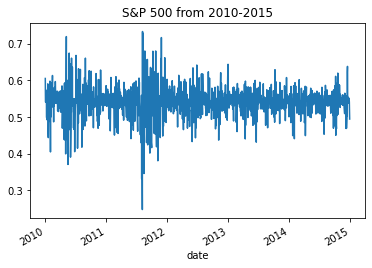

In [ ]:
#sns.set(rc={'figure.figsize':(8, 8), "lines.linewidth": 1.0})

plot = series.plot(title='S&P 500 from 2010-2015', legend=False)
fig = plot.get_figure()
#fig.savefig("s_and_p_after_preprocessing.pdf", dpi=300)
#files.download("s_and_p_after_preprocessing.pdf")

In [ ]:
# TDA Output + Resource Estimation according to equation #55
# generates pairwise distances and birth-death diagram from series data
def process_data(series):
  # Hyperparameter for Takens Time Delay Embedding
  embedding_dimension = 3                         # Upper bound for optimal embedding dimension d determined by false nearest neighbours
  embedding_time_delay = 3                        # Upper bound for optimal time delay Tau determined by mutual information or ACF
  parameters_type = "search"                      # Get optimal value for embedding_dimension & embedding_time_delay. Otherwise: "fixed"
  stride = 8                                      # Increase stride to reduce amount of data
  n_jobs=-1                                       # Maximum number of jobs to use for the computation

  # Hyperparameter for Persistence Diagrams
  # filtration = VietorisRipsPersistence          # Choose the filtration method - we do that below separately
  homology_dimensions = [0, 1, 2, 3]                 # Persistence Diagrams with 0-connected components, 1-loops, 2-voids, and higher orders
  reduced_homology=True

  # Takens Embedding
  embedder = SingleTakensEmbedding(
      parameters_type=parameters_type,
      n_jobs=n_jobs,
      time_delay=embedding_time_delay,
      dimension=embedding_dimension,
      stride=stride,
  )

  y_embedded = embedder.fit_transform(series.price)
  #print('Optimal time delay based on mutual information:', embedder.time_delay_)
  #print('Optimal embedding dimension based on false nearest neighbors:', embedder.dimension_)
  #print(f"Shape of embedded time series: {y_embedded.shape}")

  pairwise_distances = squareform(pdist(y_embedded, metric='euclidean'))

  # plot_point_cloud(y_embedded)

  # Postprocessing embedding to transform matrix for filtration process
  y_embedded = y_embedded[None, :, :]

  # Filtration method for computing the persistence diagram
  filtration = VietorisRipsPersistence

  # Create Persistence Diagrams from Takens Time Delay Embedding
  persistence = filtration(
      homology_dimensions=homology_dimensions, n_jobs=6, reduced_homology=reduced_homology)
  print("Persistence Diagram")
  diagram = persistence.fit_transform_plot(y_embedded)

  return pairwise_distances, diagram

*Get Filtration Plot*

Persistence Diagram


/usr/local/lib/python3.7/dist-packages/matplotlib/collections.py:153: ComplexWarning:

Casting complex values to real discards the imaginary part



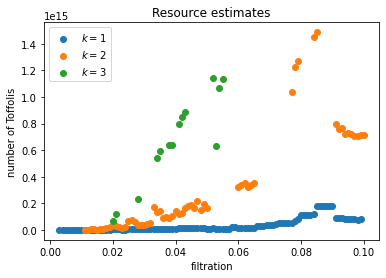

In [ ]:
pairwise_distances, diagram = process_data(series)
get_filtration_plot(pairwise_distances, diagram, [1, 2, 3], 0.0001, 0.0001)

**Get Delta R Plot**

Persistence Diagram


[(2289745182356.902+0j), (2243015688839.414+0j), (2196286195321.926+0j), (2149556701804.4385+0j), (2102827208286.9504+0j), (2056097714769.4622+0j), (2009368221251.975+0j), (1962638727734.487+0j), (1915909234216.999+0j), (1869179740699.5115+0j), (1822450247182.0234+0j), (1775720753664.536+0j), (1728991260147.048+0j), (1682261766629.5603+0j), (1635532273112.0723+0j), (1588802779594.5845+0j), (1542073286077.0967+0j), (1495343792559.6091+0j), (1448614299042.121+0j), (1401884805524.6335+0j), (1355155312007.1458+0j), (1308425818489.6582+0j), (1261696324972.1702+0j), (1214966831454.6824+0j), (1168237337937.1946+0j), (1121507844419.707+0j), (1074778350902.2192+0j), (1028048857384.7311+0j), (981319363867.2435+0j), (934589870349.7557+0j), (887860376832.2678+0j), (841130883314.7802+0j), (794401389797.2922+0j), (747671896279.8046+0j), (700942402762.3168+0j), (654212909244.8289+0j), (607483415727.3412+0j), (560753922209.8535+0j), (514024428692.36554+0j), (467294935174.87787+0j), (420565441657.3901+

/usr/local/lib/python3.7/dist-packages/matplotlib/collections.py:153: ComplexWarning:

Casting complex values to real discards the imaginary part



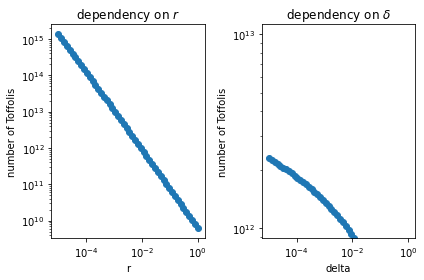

In [ ]:
pairwise_distances, diagram = process_data(series)
get_delta_r_plot(pairwise_distances, diagram, 3)

*Get Gap Plot*

Persistence Diagram


/usr/local/lib/python3.7/dist-packages/matplotlib/collections.py:153: ComplexWarning:

Casting complex values to real discards the imaginary part



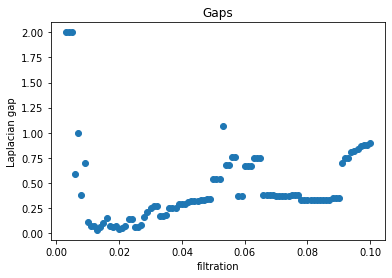

In [ ]:
pairwise_distances, diagram = process_data(series)
get_gap_plot(pairwise_distances, diagram)

*Get Size Plot*

In [ ]:
#pairwise_distances_list = []
#diagram_list = []

#for i in range(1, 6):
#  pairwise_distances, diagram = process_data(series[::i])
#  pairwise_distances_list.append(pairwise_distances)
#  diagram_list.append(diagram)

#get_size_plot(pairwise_distances_list, diagram_list, [1,2,3], 0.01, 0.01, 0.5)

In [ ]:
#get_size_plot(pairwise_distances_list, diagram_list, [1,2,3], 0.01, 0.01, 0.276)

In [ ]:
#a, b = process_data(series)
#pairwise_distances_list[0] == a

In [ ]:
#b == diagram_list[0]

*Resource Estimation for classical resources required (pending)*

* Would you be open to running some more Betti number calculations in order to benchmark for us how long they are taking classically?
* The graphs we would want to run the Betti number calculation on are those described in Section IV.A of the current note (graphs with large Betti numbers).
* Robbie, can you confirm that m = n / 5 (I think that's what Dominic said) gives the largest speedup? The goal is then to try to extrapolate the scaling of the classical computation's cost. -
* Ok. So in that case: Alex we would want some numbers on the classical cost of computing the Betti number of the graph I mentioned before with m=5 and k = n/5 for n from 5 to as large as you can go!

We are interested in the ratio of the Betti number to n choose k.  The choice k=n/5 just maximises the Betti number itself.  If we are wanting to maximise the ratio of classical to quantum runtimes, then we are trying to maximise
betti_k  (n choose k+1)
where I've included the shift by 1 for k.  That gives optimal k for the various n as:
* N = 10, k = 3
* N = 20, k = 6
* N = 30, k = 9
* N = 40, k = 12
* N = 50, k = 16
* N = 60, k = 19
* N = 70, k = 22
* N = 80, k = 25
* N = 90, k = 29
* N = 100, k = 32


 m = 5

n = 5, 10, 15 etc biggest size

run calculations in increments of 5

k = n/m, so n/5 etc

**k cluster, m vertices (nodes)**

Betti equation given by euqtaion 65: *Let K(m, k) be the k-partite complete graph, where each partition contains m vertices. That is, K(m, k) consists of k clusters, each with m vertices. K(m, 1) is a collection of m points with no edges.*

The $(k-1)^{\text{th}}$ Betti number of (the clique complex of) $K(m,k)$ is

> $\beta_{k-1} = (m-1)^k$

whats is the scaling of the algorithm running? n choose k^2 or k?


m = 5 vertices (nodes) per cluster

n = 5, 10, 15 etc biggest size

run calculations in increments of 5

k cluster = n/m, so n/5 etc

In [ ]:
# D_ij = 2 for all nodes which share a cluster
m = np.array([[0,2,2,2,2], [2,0,2,2,2], [2,2,0,2,2], [2,2,2,0,2], [2,2,2,2,0]])

# D_ij = 1 for all nodes in different clusters
n = np.ones((5, 5))

# Create distance matrix and draw network
DistMatrix= np.block([[m, n, n, n],
                      [n, m, n, n],
                      [n, n, m, n],
                      [n, n, n, m]])
G=nx.from_numpy_matrix(DistMatrix)
nx.draw(G)

In [ ]:
DistMatrix

In [ ]:
pairwise_distances = DistMatrix[None, :, :]

# Create Persistence Diagrams
filtration = VietorisRipsPersistence
persistence = filtration(
    homology_dimensions=[0, 1, 2, 3, 4, 5],
    metric='precomputed',
    n_jobs=-1,
    reduced_homology=True,
    coeff=2,
    collapse_edges=True,
    max_edge_length=2.0)
diagram = persistence.fit_transform_plot(pairwise_distances)

In [ ]:
# Extract total number of topological features and per homology dimension
table = pd.DataFrame((NumberOfPoints(n_jobs=-1).fit_transform(diagram)),
                     columns=['H0', 'H1', 'H2', 'H3', 'H4', 'H5'], index=['Topological Features'])
pd.set_option('display.max_rows', None)
table.insert(6, "Sum", table.sum(1))
table

(Interesting notebook of (classical) TDA using Giotto: https://github.com/GUDHI/TDA-tutorial/blob/master/Tuto-GUDHI-optimization.ipynb)

**CPU Performance Test**

In [ ]:
import math
import sympy
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from psutil import *
cpu_count()

2

In [ ]:
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 79
model name	: Intel(R) Xeon(R) CPU @ 2.20GHz
stepping	: 0
microcode	: 0x1
cpu MHz		: 2199.998
cache size	: 56320 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 hle avx2 smep bmi2 erms invpcid rtm rdseed adx smap xsaveopt arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs taa mmio_stale_data retbleed
bogomips	: 4399.99
clflush size	: 64
cache_alignment	: 64
address sizes

    CPU Performance in sec
5                 0.000021
10                0.000044
15                0.000499
20                0.004968
25                0.051973


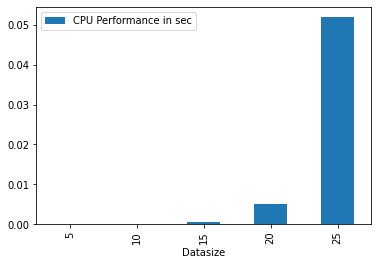

In [ ]:
# Compute and display complexity of Fibonacci

import time

def fibonacci(n):
    if n <= 1:
        return n
    return fibonacci(n-1) + fibonacci(n-2)


# My input data for the function
my_tuple = 5,10,15,20,25

# Define empty bucket
rows_list = []

for n in my_tuple:

    # Begin tracking CPU time
    st = time.process_time(),

    # Run algorithms
    result = fibonacci(n),

    # Finish tracking CPU time
    et = time.process_time(),

    # Calculate performance (end - begin)
    performance = [x - y for x, y in zip(list(et), list(st))]

    # Collect results in a list
    rows_list.append(performance)

# Write results in a table
df = pd.DataFrame(rows_list, index=my_tuple, columns=['CPU Performance in sec'])
print(df)

# Visualize results in a graph
df = df.reset_index().rename(columns={"index": "Datasize"})
df.plot(x ='Datasize', y='CPU Performance in sec', kind = 'bar')